# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Fauzan Alkhairi
- Email: fauzanalkhairi27@gmail.com
- Id Dicoding: fauzan_alkhairi

## Persiapan

Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Menyiapkan data yang akan digunakan

In [2]:
# Memuat data
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
data = pd.read_csv(url, sep=';')

print('Info Dataset:')
print(data.info())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         442

In [3]:
print("\nLima Data Teratas:")
data.head()


Lima Data Teratas:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [4]:
# Melihat statistik deskriptif
print("\nStatistik Deskriptif:")
data.describe()


Statistik Deskriptif:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
# Memeriksa jumlah nilai hilang
print("\nJumlah Nilai Hilang:")
data.isnull().sum()


Jumlah Nilai Hilang:


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


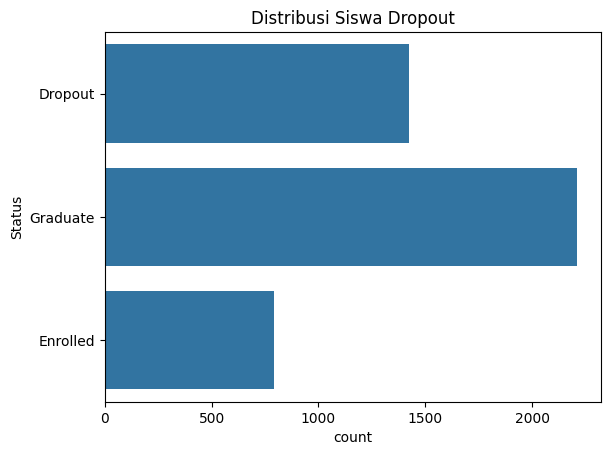

In [6]:
# Visualisasi Distribusi Dropout
sns.countplot(data['Status'])
plt.title('Distribusi Siswa Dropout')
plt.show()

## Data Preparation / Preprocessing

In [7]:
# Mengecek missing values
missing_values = data.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values[missing_values > 0])

Jumlah Missing Values per Kolom:
Series([], dtype: int64)


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Menggunakan LabelEncoder untuk kolom Status
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])

# One-Hot Encoding untuk kolom kategorikal lainnya
data = pd.get_dummies(data, columns=['Gender', 'Daytime_evening_attendance', 'International'], drop_first=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data numerik
scaler = MinMaxScaler()
# Exclude the 'Status' column from the numerical columns to be scaled
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.drop('Status', errors='ignore')
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nData setelah Normalisasi:")
data.head()


Data setelah Normalisasi:


,Marital_status,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Gender_1,Daytime_evening_attendance_1,International_1
0,0.0,0.285714,0.555556,0.013858,0.0,0.284211,0.0,0.418605,0.255814,0.025773,...,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,True,True,False
1,0.0,0.250000,0.111111,0.925989,0.0,0.684211,0.0,0.000000,0.046512,0.015464,...,0.30,0.735897,0.0,0.732558,0.111111,0.640687,2,True,True,False
2,0.0,0.000000,0.555556,0.907512,0.0,0.284211,0.0,0.837209,0.837209,0.046392,...,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,True,True,False
3,0.0,0.285714,0.222222,0.978108,0.0,0.284211,0.0,0.860465,0.837209,0.025773,...,0.25,0.667692,0.0,0.209302,0.000000,0.124174,2,False,True,False
4,0.2,0.678571,0.111111,0.801466,0.0,0.052632,0.0,0.837209,0.860465,0.046392,...,0.30,0.700000,0.0,0.732558,0.111111,0.640687,2,False,False,False


In [10]:
# Memisahkan fitur dan label
X = data.drop(columns=['Status'])
y = data['Status']

print("\nBentuk Fitur (X):", X.shape)
print("Bentuk Label (y):", y.shape)


Bentuk Fitur (X): (4424, 36)
Bentuk Label (y): (4424,)


In [11]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nJumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])


Jumlah Data Training: 3539
Jumlah Data Testing: 885


## Modeling

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model
model = LogisticRegression(random_state=42)

# Training model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Logistic Regression: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi Logistic Regression: 75.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       284
           1       0.51      0.30      0.37       159
           2       0.78      0.93      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885

Confusion Matrix:
[[213  29  42]
 [ 38  47  74]
 [ 13  17 412]]


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Training model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf * 100:.2f}%")

Akurasi Random Forest: 77.63%


In [14]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       284
           1       0.59      0.36      0.45       159
           2       0.80      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.68      0.70       885
weighted avg       0.76      0.78      0.76       885

Confusion Matrix:
[[215  24  45]
 [ 41  57  61]
 [ 11  16 415]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search dengan 5-fold cross-validation
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Melakukan tuning
grid_rf.fit(X_train, y_train)

# Hasil tuning
print("Best Parameters:", grid_rf.best_params_)
print(f"Best Accuracy: {grid_rf.best_score_ * 100:.2f}%")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 78.02%


## Evaluation

In [16]:
# Menggunakan model terbaik
best_rf = grid_rf.best_estimator_

# Prediksi dengan model terbaik
y_pred_best = best_rf.predict(X_test)

# Evaluasi Akurasi
accuracy_best_rf = accuracy_score(y_test, y_pred_best)
print(f"Akurasi Model Random Forest Terbaik: {accuracy_best_rf * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Akurasi Model Random Forest Terbaik: 76.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.57      0.35      0.43       159
           2       0.78      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



In [17]:
# Menggunakan model terbaik hasil tuning
y_pred_best = best_rf.predict(X_test)

# Menambahkan kolom prediksi pada data testing
X_test['Predicted_Status'] = y_pred_best

# Menampilkan data siswa yang diprediksi akan dropout
dropout_pred = X_test[X_test['Predicted_Status'] == 'Dropout']
print(f"Jumlah Siswa yang Diprediksi Dropout: {len(dropout_pred)}")

Jumlah Siswa yang Diprediksi Dropout: 0


In [18]:
dropout_pred.head()

,Marital_status,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Gender_1,Daytime_evening_attendance_1,International_1,Predicted_Status


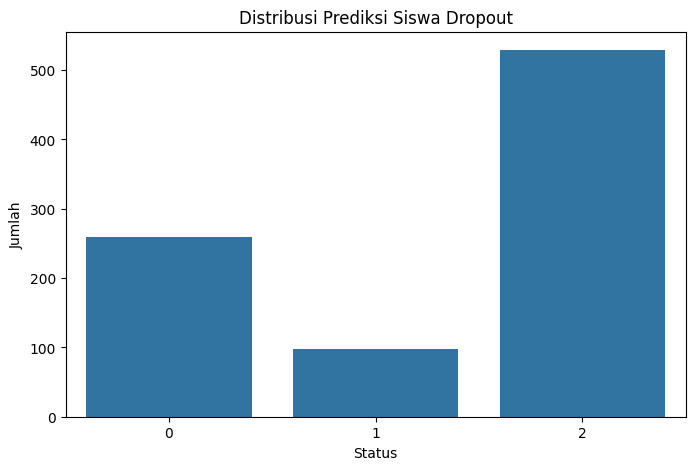

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted_Status', data=X_test)
plt.title('Distribusi Prediksi Siswa Dropout')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

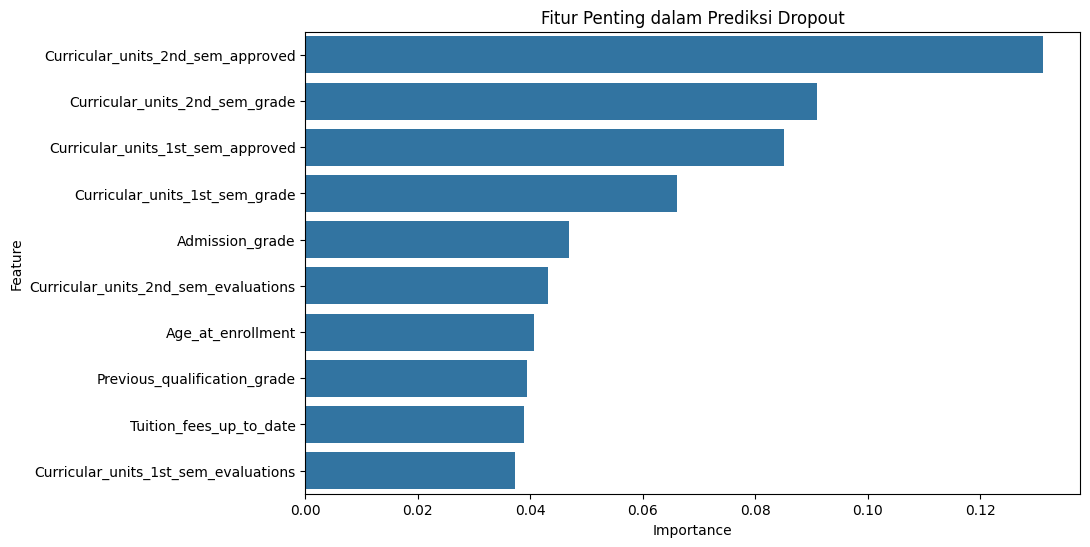

In [20]:
# Mendapatkan fitur penting
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualisasi fitur penting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Fitur Penting dalam Prediksi Dropout')
plt.show()

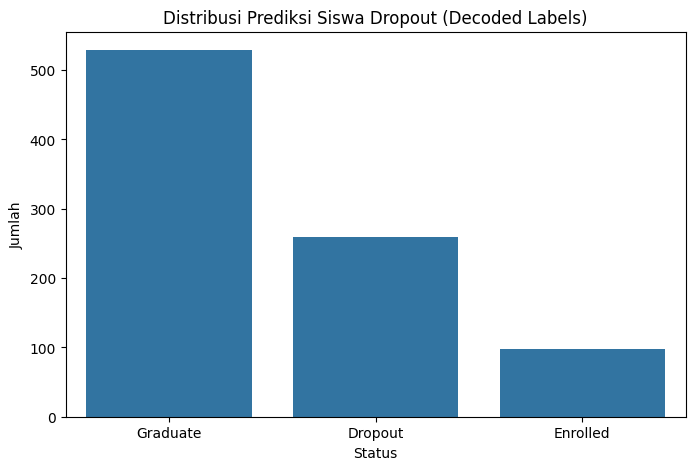

In [21]:
from sklearn.preprocessing import LabelEncoder

# Decode hasil prediksi using the correct encoder variable
y_pred_decoded = label_encoder.inverse_transform(y_pred_best)

# Visualisasi kembali dengan label aslinya
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan hasil prediksi ke DataFrame
df_pred = pd.DataFrame({'Predicted_Status': y_pred_decoded})

# Visualisasi
plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted_Status', data=df_pred)
plt.title('Distribusi Prediksi Siswa Dropout (Decoded Labels)')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

In [22]:
# Salin data fitur
df_final = X_test.copy()

# Decode the actual labels
y_test_decoded = label_encoder.inverse_transform(y_test)

# Tambahkan label asli dan hasil prediksi
df_final['Actual_Status'] = y_test_decoded
df_final['Predicted_Status'] = y_pred_decoded

In [23]:
df_final.to_csv('prediksi_siswa_dropout.csv', index=False)


In [24]:
df_final

,Marital_status,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Gender_1,Daytime_evening_attendance_1,International_1,Predicted_Status,Actual_Status
1853,0.0,0.767857,0.111111,0.900783,0.904762,0.684211,0.0,0.046512,0.046512,0.010309,...,0.789744,0.000000,0.558140,0.288889,0.772787,True,True,False,Graduate,Graduate
2399,0.0,0.285714,0.111111,0.950693,0.000000,0.378947,0.0,0.000000,0.000000,0.025773,...,0.630673,0.000000,1.000000,0.244444,0.414795,True,True,False,Graduate,Graduate
510,0.0,0.000000,0.222222,0.907512,0.000000,0.273684,0.0,0.069767,0.000000,0.010309,...,0.000000,0.000000,0.209302,0.000000,0.124174,False,True,False,Dropout,Enrolled
242,0.0,0.000000,0.222222,0.915244,0.000000,0.242105,0.0,0.837209,0.418605,0.025773,...,0.732308,0.000000,0.558140,0.288889,0.772787,False,True,False,Graduate,Graduate
3392,0.0,0.000000,0.111111,0.907512,0.000000,0.401053,0.0,0.000000,0.000000,0.046392,...,0.682051,0.000000,1.000000,0.244444,0.414795,False,True,False,Graduate,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.767857,0.111111,0.900783,0.904762,0.578947,0.0,0.046512,0.023256,0.010309,...,0.584615,0.000000,0.918605,0.800000,0.000000,True,True,False,Graduate,Dropout
2418,0.0,0.928571,0.111111,0.013858,0.976190,0.368421,0.0,0.000000,0.418605,0.046392,...,0.682051,0.000000,0.151163,0.488889,1.000000,True,True,False,Graduate,Graduate
2367,0.0,0.285714,0.111111,0.913537,0.000000,0.378947,0.0,0.255814,0.255814,0.010309,...,0.735897,0.000000,0.558140,0.288889,0.772787,True,True,False,Graduate,Graduate
1801,0.0,0.750000,0.222222,0.801466,0.047619,0.368421,0.0,0.767442,0.767442,0.000000,...,0.715385,0.166667,0.000000,0.755556,0.578600,True,False,False,Graduate,Graduate
